Primeras filas del dataset:
     Mes   Categoría  Cantidad Vendida  Precio Unitario  Ingreso Total  \
0  Enero     Camisas                33            44.09        1455.00   
1  Enero  Pantalones                59            48.78        2878.10   
2  Enero    Vestidos               130            48.15        6259.44   
3  Enero      Blusas               143            26.04        3723.72   
4  Enero      Shorts                64            17.98        1150.85   

   Costo Unitario  Costo Total  Utilidad Bruta     ISV  Ingreso Neto  
0           26.36       869.88          585.12  218.25       1236.75  
1           35.33      2084.47          793.63  431.71       2446.39  
2           29.23      3799.90         2459.54  938.92       5320.52  
3           15.33      2192.19         1531.53  558.56       3165.16  
4           14.31       915.84          235.01  172.63        978.22  


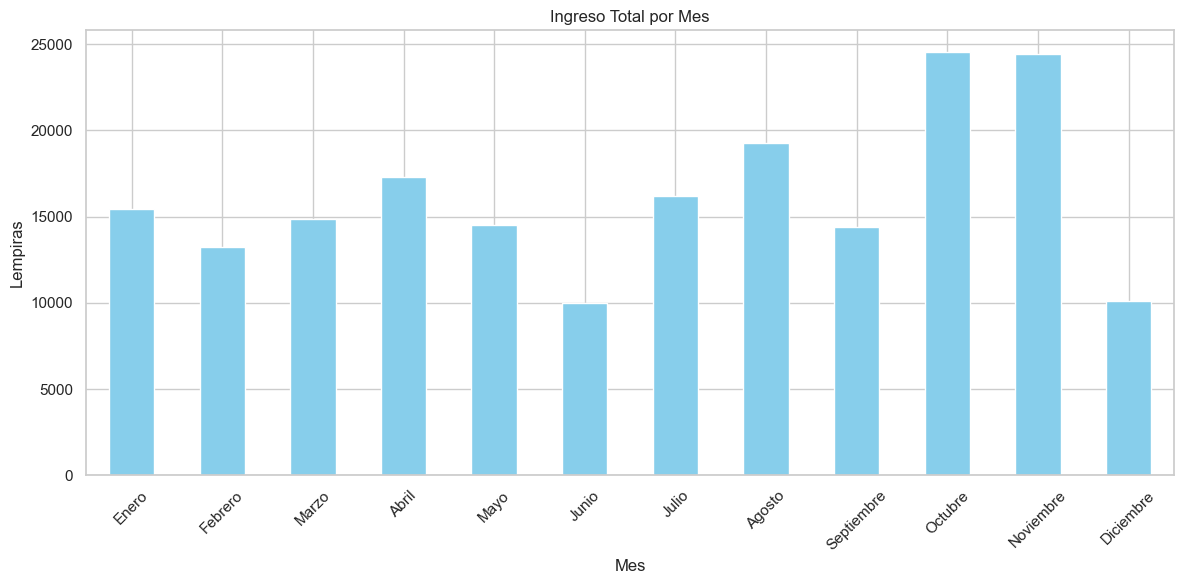

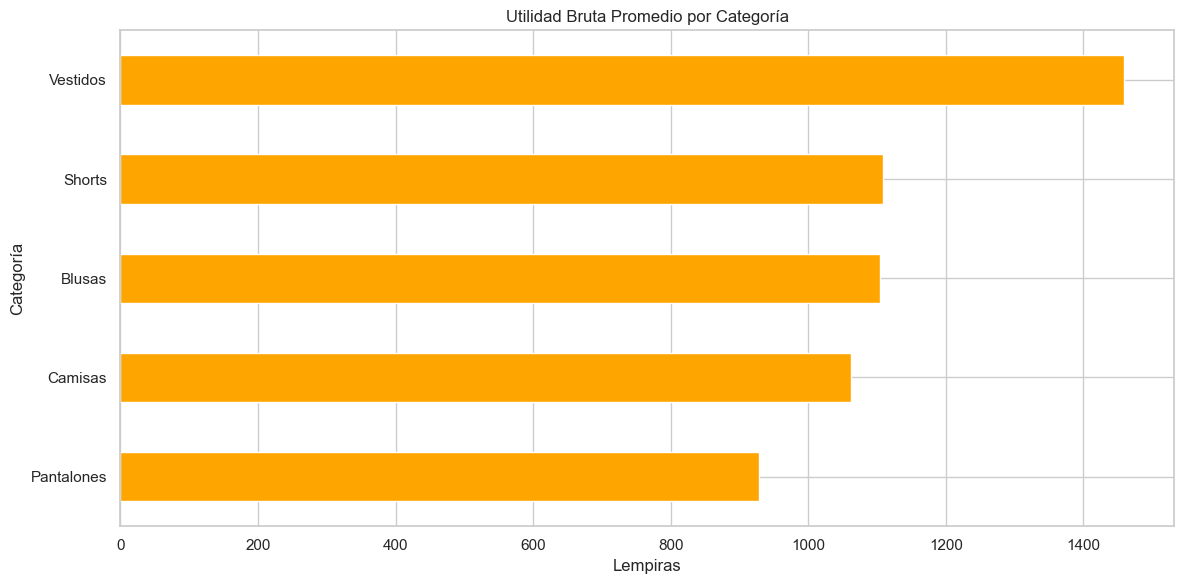

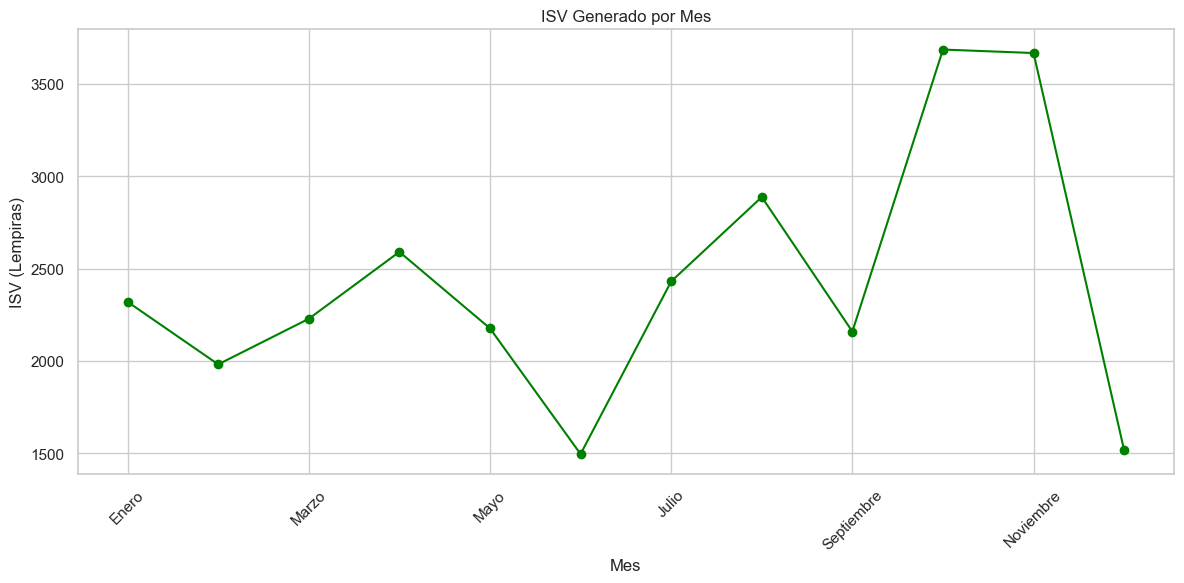

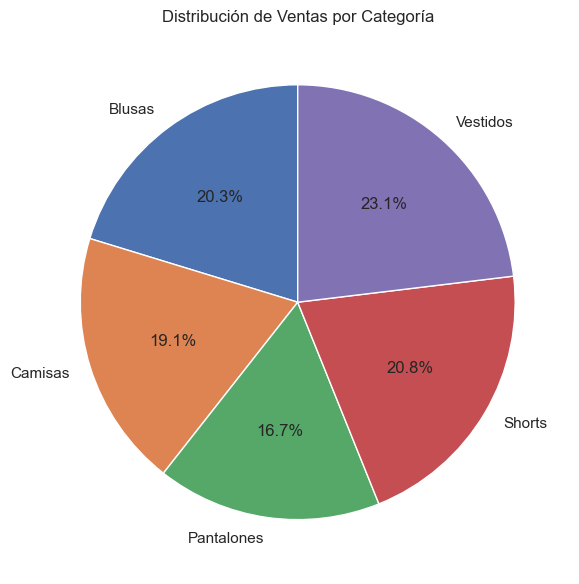

In [5]:
# Aqui en este segmente se llegan a cargar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CAqui llegamos a configurar el estilo de los graficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Aqui se carga el archivo CSV
df = pd.read_csv("datosExcel.csv")


print("Primeras filas del dataset:")
print(df.head())


# Realizamos un analisis general de las ventas


# Aqui hacemos un total de ingresos por mes
ingresos_mensuales = df.groupby("Mes")["Ingreso Total"].sum().reindex([
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
])

# Realizamos un grafico de barras para el ingreso total por mes
ingresos_mensuales.plot(kind="bar", color="skyblue")
plt.title("Ingreso Total por Mes")
plt.ylabel("Lempiras")
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# llegamos a la utilidad bruta promedio por categoria

utilidad_por_categoria = df.groupby("Categoría")["Utilidad Bruta"].mean().sort_values()

# Gráfico de barras horizontal
utilidad_por_categoria.plot(kind="barh", color="orange")
plt.title("Utilidad Bruta Promedio por Categoría")
plt.xlabel("Lempiras")
plt.ylabel("Categoría")
plt.tight_layout()
plt.show()


# realizamos un grafico de linea para el ISV total por mes

isv_mensual = df.groupby("Mes")["ISV"].sum().reindex([
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
])

# aqui decidimos realizar un grafico de linea para el ISV total por mes
isv_mensual.plot(kind="line", marker='o', linestyle='-', color='green')
plt.title("ISV Generado por Mes")
plt.ylabel("ISV (Lempiras)")
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Grafico de pastel para la distribucion de ventas por categoria para todoe el año de ventas que obtuvo el negocio de zambranos.
ventas_categoria = df.groupby("Categoría")["Cantidad Vendida"].sum()

ventas_categoria.plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Distribución de Ventas por Categoría")
plt.ylabel("")
plt.tight_layout()
plt.show()


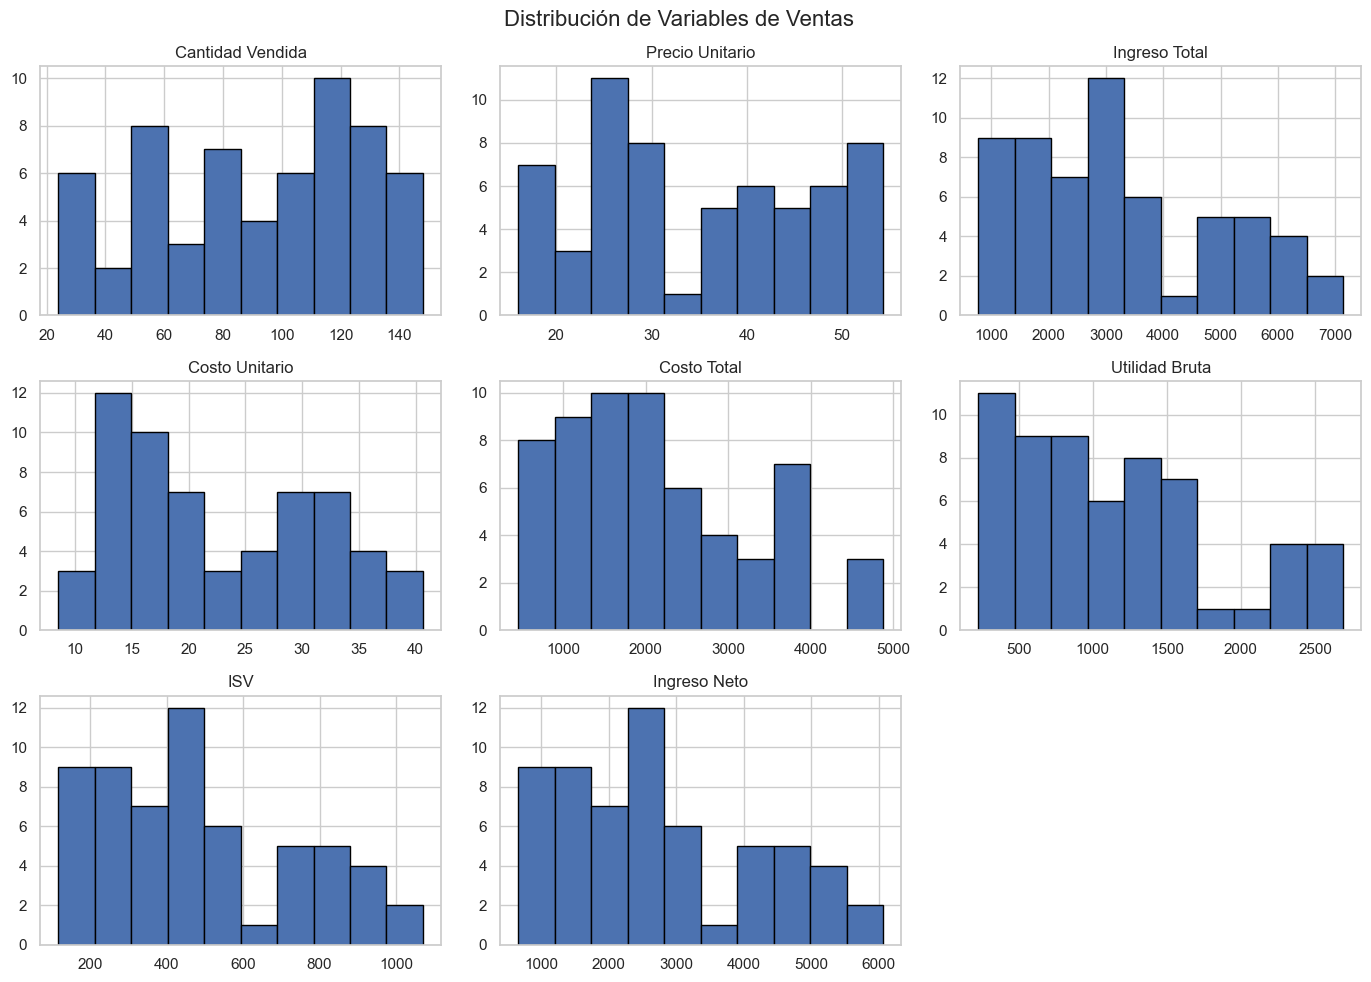

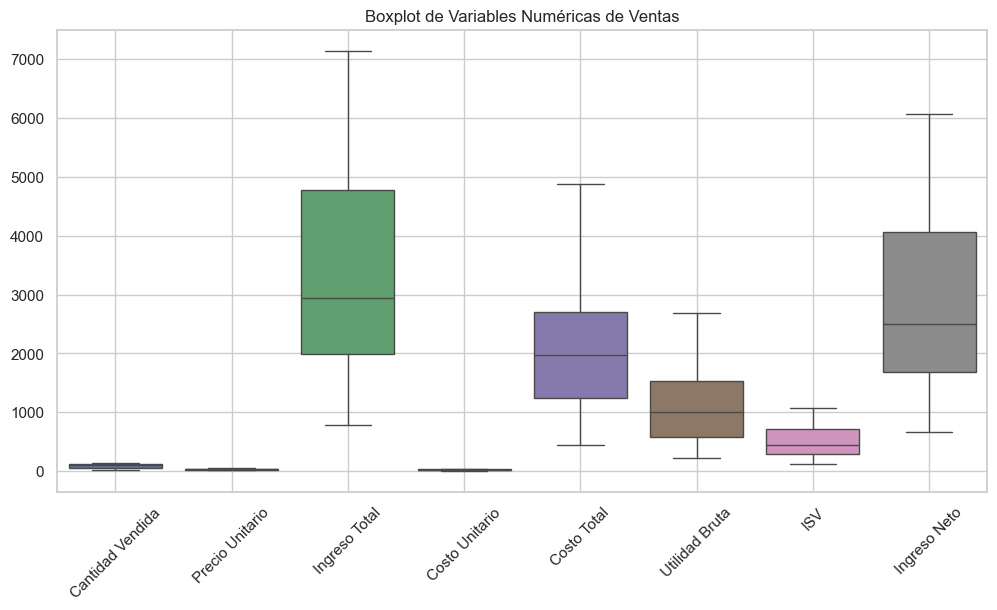

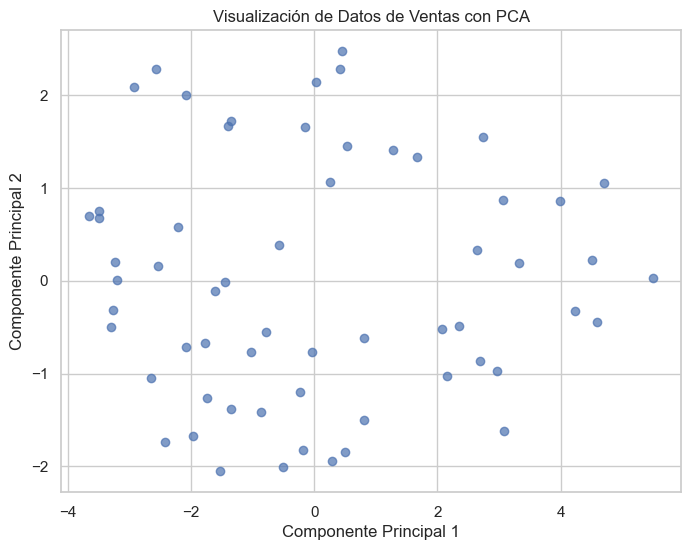

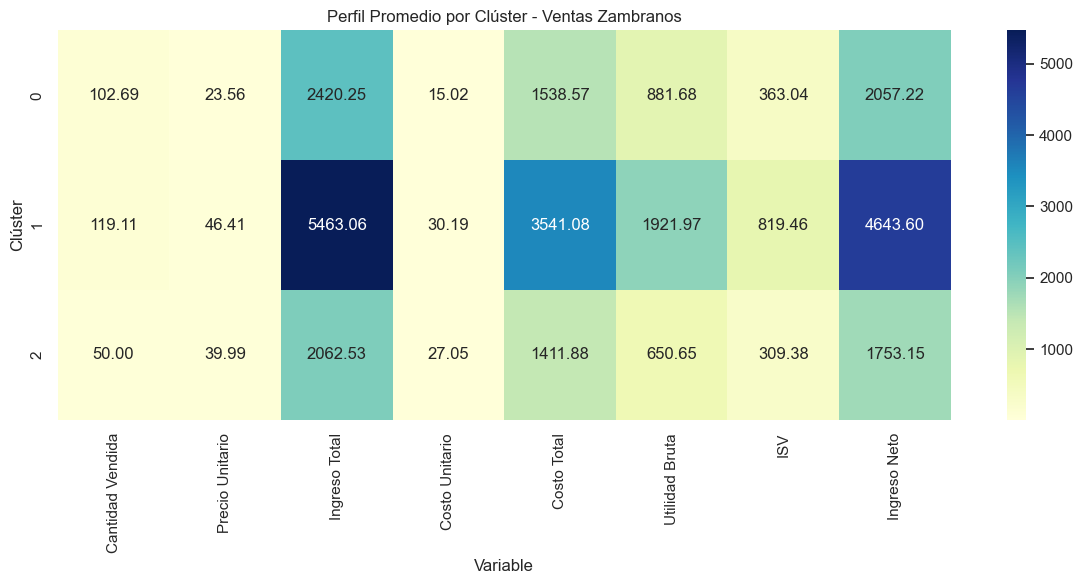

In [1]:
# Aqui con mi compañero josue importamos todas las librerias necesarias para el analisis de datos aprendidos en clase.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


plt.rcParams["figure.figsize"] = (10, 5)

# Cargamos el archivo CSV
df = pd.read_csv("datosExcel.csv")  

# Definimos las variables que vamos a utilizar para el analisis de los datos
variables = ['Cantidad Vendida', 'Precio Unitario', 'Ingreso Total', 
             'Costo Unitario', 'Costo Total', 'Utilidad Bruta', 'ISV', 'Ingreso Neto']

# Realizamos un Histograma para visualizar los datos de las ventas
df[variables].hist(figsize=(14, 10), bins=10, edgecolor='black')
plt.suptitle("Distribución de Variables de Ventas", fontsize=16)
plt.tight_layout()
plt.show()

# Realizamos un Boxplot para visualizar los datos de las ventas
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[variables])
plt.title("Boxplot de Variables Numéricas de Ventas")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Realizamos un Gráfico de dispersión PCA para visualizar los datos de las ventas

X = df[variables]
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Realizamos un Gráfico de dispersión PCA para visualizar los datos de las ventas
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title("Visualización de Datos de Ventas con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

# Realizamos un Clustering y mapa de calor para visualizar los datos de las ventas
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

perfil_cluster = df.groupby('Cluster')[variables].mean().round(2)

plt.figure(figsize=(12, 6))
sns.heatmap(perfil_cluster, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Perfil Promedio por Clúster - Ventas Zambranos")
plt.xlabel("Variable")
plt.ylabel("Clúster")
plt.tight_layout()
plt.show()


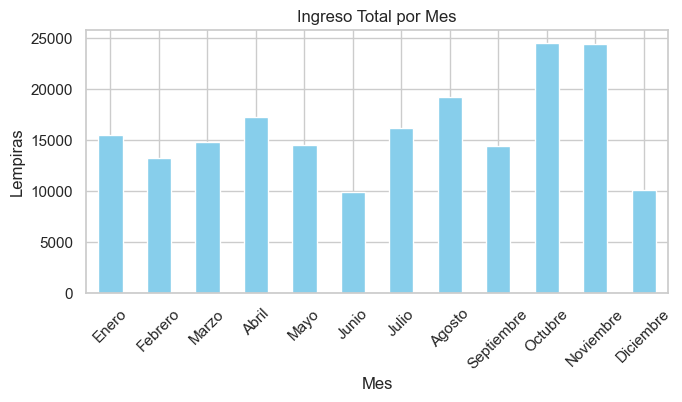

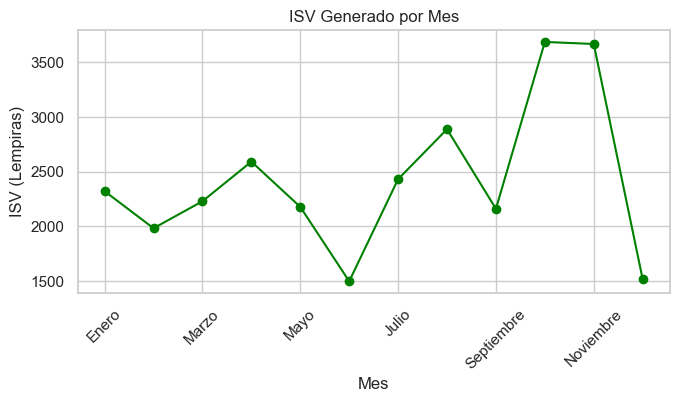

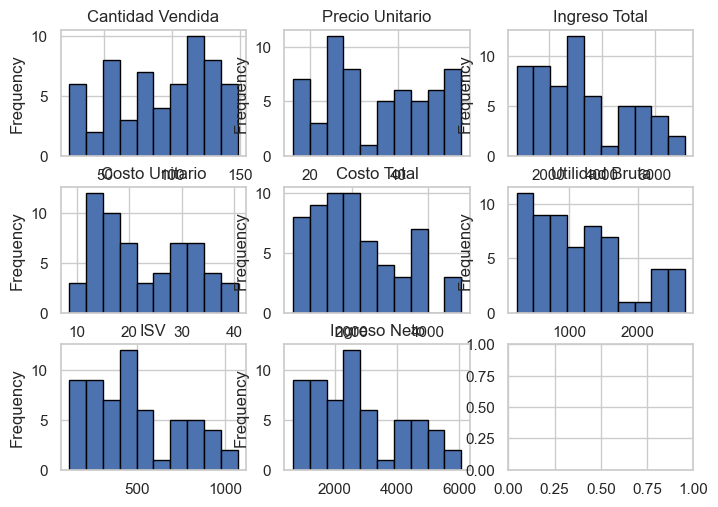

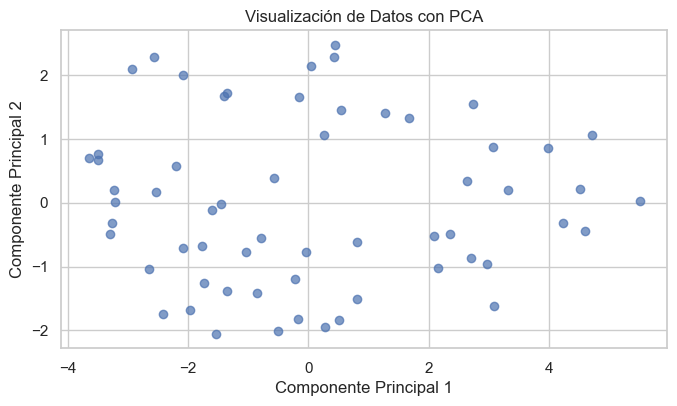

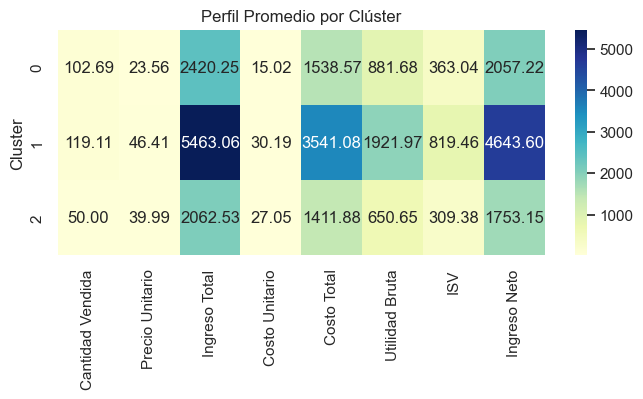

In [15]:
import tkinter as tk
from tkinter import Toplevel
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Cargar datos
df = pd.read_csv("datosExcel.csv")
meses_orden = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
               'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
variables = ['Cantidad Vendida', 'Precio Unitario', 'Ingreso Total',
             'Costo Unitario', 'Costo Total', 'Utilidad Bruta', 'ISV', 'Ingreso Neto']

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 4)

# Función para mostrar gráfica en ventana emergente
def mostrar_grafica(figura, titulo):
    ventana_graf = tk.Toplevel()
    ventana_graf.title(titulo)
    ventana_graf.geometry("700x500")
    ventana_graf.configure(bg="#f9f9f9")

    canvas = FigureCanvasTkAgg(figura, master=ventana_graf)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True, padx=10, pady=10)

    tk.Button(ventana_graf, text="Regresar", bg="#1e88e5", fg="white", font=("Segoe UI", 10, "bold"),
              command=ventana_graf.destroy).pack(pady=10)

# Funciones de gráficas individuales
def mostrar_ingresos():
    fig, ax = plt.subplots()
    df.groupby("Mes")["Ingreso Total"].sum().reindex(meses_orden).plot(kind="bar", ax=ax, color="skyblue")
    ax.set_title("Ingreso Total por Mes")
    ax.set_ylabel("Lempiras")
    ax.set_xlabel("Mes")
    ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    mostrar_grafica(fig, "Análisis de Ingresos")

def mostrar_isv():
    fig, ax = plt.subplots()
    df.groupby("Mes")["ISV"].sum().reindex(meses_orden).plot(kind="line", marker='o', ax=ax, color='green')
    ax.set_title("ISV Generado por Mes")
    ax.set_ylabel("ISV (Lempiras)")
    ax.set_xlabel("Mes")
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    mostrar_grafica(fig, "Análisis de ISV")

def mostrar_categoria():
    fig, ax = plt.subplots()
    df.groupby("Categoría")["Cantidad Vendida"].sum().plot(kind="pie", autopct='%1.1f%%', startangle=90, ax=ax)
    ax.set_title("Distribución de Ventas por Categoría")
    ax.set_ylabel("")
    plt.tight_layout()
    mostrar_grafica(fig, "Ventas por Categoría")

def mostrar_histograma():
    fig, axs = plt.subplots(3, 3, figsize=(14, 10))
    axs = axs.ravel()
    for i, col in enumerate(variables):
        df[col].plot(kind='hist', bins=10, edgecolor='black', ax=axs[i])
        axs[i].set_title(col)
    plt.tight_layout()
    mostrar_grafica(fig, "Histograma de Variables")

def mostrar_boxplot():
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.boxplot(data=df[variables], ax=ax)
    ax.set_title("Boxplot de Variables Numéricas de Ventas")
    ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    mostrar_grafica(fig, "Boxplot de Variables")

def mostrar_pca():
    fig, ax = plt.subplots()
    X_scaled = StandardScaler().fit_transform(df[variables])
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(X_scaled)
    ax.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
    ax.set_title("Visualización de Datos con PCA")
    ax.set_xlabel("Componente Principal 1")
    ax.set_ylabel("Componente Principal 2")
    plt.tight_layout()
    mostrar_grafica(fig, "Análisis PCA")

def mostrar_clustering():
    fig, ax = plt.subplots()
    X_scaled = StandardScaler().fit_transform(df[variables])
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_scaled)
    perfil = df.groupby("Cluster")[variables].mean().round(2)
    sns.heatmap(perfil, annot=True, cmap="YlGnBu", fmt=".2f", ax=ax)
    ax.set_title("Perfil Promedio por Clúster")
    plt.tight_layout()
    mostrar_grafica(fig, "Mapa de Calor por Clúster")

def mostrar_utilidad_categoria():
    fig, ax = plt.subplots()
    df.groupby("Categoría")["Utilidad Bruta"].mean().sort_values().plot(kind="barh", color="orange", ax=ax)
    ax.set_title("Utilidad Bruta Promedio por Categoría")
    ax.set_xlabel("Lempiras")
    plt.tight_layout()
    mostrar_grafica(fig, "Utilidad Bruta por Categoría")

# Submenú de análisis
def abrir_menu_analisis():
    ventana.destroy()
    subventana = tk.Tk()
    subventana.title("Análisis de Datos")
    subventana.geometry("360x600")
    subventana.configure(bg="#ffffff")

    tk.Label(subventana, text="Selecciona un análisis", font=("Segoe UI", 13, "bold"), bg="#ffffff").pack(pady=20)

    opciones = [
        ("Ingreso Total por Mes", mostrar_ingresos),
        ("ISV por Mes", mostrar_isv),
        ("Ventas por Categoría", mostrar_categoria),
        ("Histograma de Variables", mostrar_histograma),
        ("Boxplot de Variables", mostrar_boxplot),
        ("Análisis PCA", mostrar_pca),
        ("Mapa de Calor por Clúster", mostrar_clustering),
        ("Utilidad por Categoría", mostrar_utilidad_categoria)
    ]

    for texto, funcion in opciones:
        tk.Button(subventana, text=texto, width=35, bg="#3949ab", fg="white",
                  font=("Segoe UI", 10, "bold"), command=funcion).pack(pady=5)

    tk.Button(subventana, text="Salir", width=35, bg="#e53935", fg="white",
              font=("Segoe UI", 10, "bold"), command=subventana.destroy).pack(pady=15)

    subventana.mainloop()

# Ventana principal
ventana = tk.Tk()
ventana.title("Sistema de Análisis de Ventas - Zambranos")
ventana.geometry("320x250")
ventana.configure(bg="#ffffff")

# Botones principales
tk.Label(ventana, text="Menú Principal", font=("Segoe UI", 13, "bold"), bg="#ffffff").pack(pady=20)
tk.Button(ventana, text="Ver Gráficas", width=25, bg="#1e88e5", fg="white", font=("Segoe UI", 10, "bold"),
          command=abrir_menu_analisis).pack(pady=10)
tk.Button(ventana, text="Salir", width=25, bg="#e53935", fg="white", font=("Segoe UI", 10, "bold"),
          command=ventana.destroy).pack(pady=10)

ventana.mainloop()
